# Rainfall Prediction in Australia

Hence, in this kernel, I implement Logistic Regression with Python and Scikit-Learn and build a classifier to predict whether or not it will rain tomorrow in Australia. I train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns',None)



In [2]:
dataset=pd.read_csv('C:/Users/Admin/Desktop/Practisse/weatherAUS.csv')
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [3]:
dataset.shape

(142193, 24)

In [4]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

# Exploratory data analysis 

In [6]:
dataset.shape

(142193, 24)

We can see that there are 142193 instances and 24 variables in the data set.

# Preview the dataset

In [7]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# View column names

In [8]:
col_names=dataset.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Drop RISK_MM variable 

It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description. So, we should drop it as follows-

In [9]:
dataset.drop(columns=['RISK_MM'],inplace=True)

# View summary of dataset 

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

# Comment

We can see that the dataset contains mixture of categorical and numerical variables.

Categorical variables have data type object.

Numerical variables have data type float64.

# View statistical properties of dataset

In [11]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


# Important points to note

The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.

If we want to view the statistical properties of character variables, we should run the following command -



In [12]:
dataset.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-11-03,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


# Univariate Analysis 

Explore RainTomorrow target variable 

# Check for missing values

In [13]:
Rain_na=[feature for feature in dataset.columns if dataset['RainTomorrow'].isnull().sum()>1]

In [14]:
Rain_na

[]

In [15]:
dataset['RainTomorrow'].isnull().sum()

0

We can see that there are no missing values in the RainTomorrow target variable

View number of unique values

In [16]:
rain_unique=dataset['RainTomorrow'].unique()
rain_unique

array(['No', 'Yes'], dtype=object)

The two unique values are No and Yes.

In [17]:
rain_unique=dataset['RainTomorrow'].nunique()
rain_unique

2

We can see that the number of unique values in RainTomorrow variable is 2.

View the frequency distribution of values

In [18]:
raintomorrow_freq=dataset['RainTomorrow'].value_counts()
raintomorrow_freq

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

View percentage of frequency distribution of values

In [19]:
raintomorrow_per=dataset['RainTomorrow'].value_counts()/len(dataset)*100
raintomorrow_per

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

Comment
We can see that out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times.

# Visualize frequency distribution of RainTomorrow variable¶

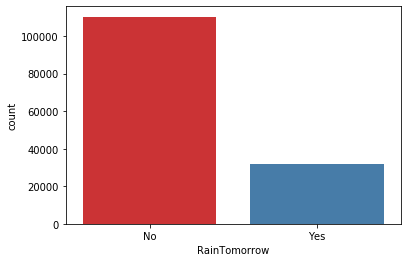

In [20]:
sns.countplot(dataset['RainTomorrow'],palette="Set1")
plt.show()

Interpretation
The above univariate plot confirms our findings that -

The No variable have 110316 entries, and

The Yes variable have 31877 entries.

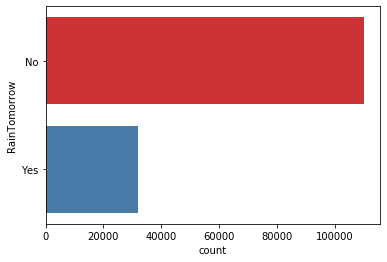

In [21]:
sns.countplot(y=dataset['RainTomorrow'],palette="Set1")
plt.show()

Findings of Univariate Analysis 
The number of unique values in RainTomorrow variable is 2.

The two unique values are No and Yes.

Out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times.

The univariate plot confirms our findings that –

The No variable have 110316 entries, and

The Yes variable have 31877 entries.

# Bivariate Analysis

Types of variables 
In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

First of all, I will find categorical variables.

# Explore Categorical Variables

In [22]:
categorical=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [23]:
print('The number of categorical feature are {}'.format(len(categorical)))

The number of categorical feature are 7


In [24]:
print('The categorical variables are',categorical)

The categorical variables are ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


view the categorical variables

In [25]:
dataset[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [26]:
dataset[categorical].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

Summary of categorical variables 
There is a date variable. It is denoted by Date column.
There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.
There are two binary categorical variables - RainToday and RainTomorrow.
RainTomorrow is the target variable.

# Explore problems within categorical variables 

Missing values in categorical variables

In [27]:
categorical_na=[feature for feature in  categorical if dataset[feature].isnull().sum()>1]
categorical_na

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [28]:
dataset[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [29]:
cat1=[feature for feature in categorical_na if  dataset[feature].isnull().sum()!=0]
cat1

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [30]:
print(dataset[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


We can see that there are only 4 categorical variables in the dataset which contains missing values. These are WindGustDir, WindDir9am, WindDir3pm and RainToday.

Frequency count of categorical variables

In [31]:
for var in categorical:
    print(dataset[var].value_counts())
    

2013-11-03    49
2013-09-03    49
2016-07-14    49
2017-05-05    49
2017-05-13    49
2013-04-09    49
2013-10-24    49
2016-09-13    49
2013-06-30    49
2016-07-15    49
2014-07-08    49
2013-10-29    49
2013-04-01    49
2014-06-09    49
2014-03-03    49
2017-02-26    49
2013-10-27    49
2013-11-27    49
2014-11-16    49
2013-12-24    49
2014-11-26    49
2017-06-12    49
2014-10-29    49
2017-01-16    49
2016-05-14    49
2014-05-27    49
2013-05-06    49
2013-11-20    49
2013-05-30    49
2016-05-23    49
              ..
2008-01-07     1
2007-11-30     1
2007-11-13     1
2008-01-15     1
2008-01-12     1
2007-12-31     1
2007-12-20     1
2007-11-07     1
2007-12-16     1
2008-01-04     1
2007-12-19     1
2008-01-21     1
2007-11-25     1
2007-11-29     1
2008-01-06     1
2008-01-11     1
2008-01-09     1
2007-11-09     1
2007-11-05     1
2007-12-09     1
2008-01-28     1
2007-11-22     1
2008-01-24     1
2007-12-02     1
2008-01-17     1
2008-01-18     1
2007-12-22     1
2007-12-25    

In [32]:
for var in categorical:
    print(var,'contains',len(dataset[var].unique()),'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 2 labels


We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables.

# Feature Engineering of Date Variable

In [33]:
dataset['Date'].dtype

dtype('O')

We can see that the data type of Date variable is object. I will parse the date currently coded as object into datetime format.

In [34]:
dataset['Year']=dataset['Date'].str.split('-').str[0]
dataset['Year']=dataset['Year'].astype(int)

In [35]:
dataset['Month']=dataset['Date'].str.split('-').str[1]

In [36]:

dataset['DATE']=dataset['Date'].str.split('-').str[2]

In [37]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,05


We can see that there are three additional columns created from Date variable. Now, I will drop the original Date variable from the dataset.

In [38]:
dataset.drop(columns=['Date'],inplace=True)

In [39]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,01
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,02
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,03
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,04
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,05


# Now, we can see that the Date variable has been removed from the dataset.

Explore Categorical Variables one by one
Now, I will explore the categorical variables one by one

In [40]:
categorical_new=[feature for feature in dataset.columns if  dataset[feature].dtype=='O']
categorical_new

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow',
 'Month',
 'DATE']

In [41]:
dataset[categorical_new].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
Month               0
DATE                0
dtype: int64

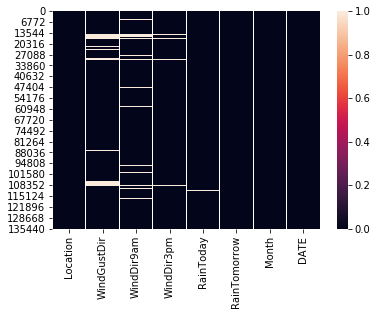

In [42]:
sns.heatmap(dataset[categorical_new].isnull())

# Explore Location variable

In [43]:
dataset['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [44]:

print('Location contains', len(dataset.Location.unique()), 'labels')

Location contains 49 labels


In [45]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,01
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,02
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,03
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,04
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,05


In [46]:
dataset.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

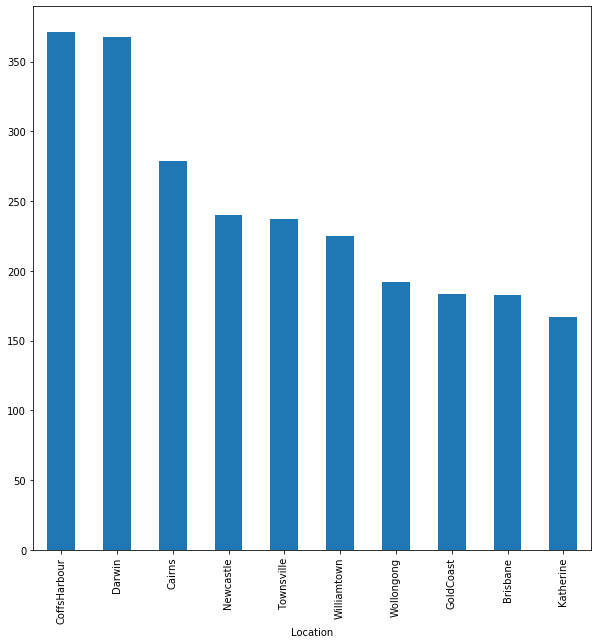

In [47]:
plt.figure(figsize=(10,10))
high_rainfall=dataset.groupby('Location')['Rainfall'].max().sort_values(ascending=False).head(10)
high_rainfall.plot(kind='bar')

In [48]:
categorical_new

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow',
 'Month',
 'DATE']

In [49]:
dataset['RainTomorrow']=dataset['RainTomorrow'].map({'Yes':1,'No':0})

In [50]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,01
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,02
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,03
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,04
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,05


In [51]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [52]:
dataset['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null int6

In [54]:
dataset['Year']=dataset['Year'].astype(int)

In [55]:
dataset['Month']=dataset['Month'].astype(int)
dataset['DATE']=dataset['DATE'].astype(int)

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null int6

# Explore WindGustDir variable

In [57]:
dataset['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [58]:
print('WindGustDir contains' ,len(dataset['WindGustDir'].unique()),'labels')

WindGustDir contains 17 labels


In [59]:
dataset['WindGustDir'].isnull().sum()

9330

In [60]:
dataset['Location'].isnull().sum()

0

In [61]:
dataset['Location']=encoder.fit_transform(dataset['Location'])

In [62]:
dataset.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5


In [63]:
dataset['Location'].unique()

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41],
      dtype=int64)

In [64]:
dataset['WindGustDir'].isnull().sum()

9330

In [65]:
dataset['WindGustDir'].fillna(dataset['WindGustDir'].mode()[0], inplace=True)

In [66]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5


In [67]:
dataset['WindGustDir'].isnull().sum()

0

In [68]:
dataset['WindGustDir']=encoder.fit_transform(dataset['WindGustDir'])

In [69]:
dataset.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5


In [70]:
dataset['WindGustDir'].unique()

array([13, 14, 15,  4,  6,  3,  5, 12,  1, 10,  8,  7,  9,  2,  0, 11],
      dtype=int64)

In [71]:
print('The number of WindGustDir has {}'.format(len(dataset['WindGustDir'].unique())))

The number of WindGustDir has 16


# Explore WindDir9am variable

In [72]:
print('WindDir9am contains', len(dataset['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [73]:
dataset['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [74]:

dataset['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [75]:
dataset['WindDir9am'].isnull().sum()

10013

In [76]:
dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0], inplace=True)

In [77]:
print('WindDir9am contains', len(dataset['WindDir9am'].unique()), 'labels')

WindDir9am contains 16 labels


In [78]:
dataset['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [79]:
dataset['WindDir9am'].nunique()

16

In [80]:
dataset['WindDir9am'].value_counts()

N      21406
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [81]:
dataset['WindDir9am']=encoder.fit_transform(dataset['WindDir9am'])

In [82]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
Location         142193 non-null int32
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      142193 non-null int32
WindGustSpeed    132923 non-null float64
WindDir9am       142193 non-null int32
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null int64
Y

In [84]:
categorical_new=[feature for feature in categorical_new if dataset[feature].dtype=='O']
categorical_new

['WindDir3pm', 'RainToday']

# Explore WindDir3pm variable

In [85]:

print('WindDir3pm', len(dataset['WindDir3pm'].unique()), 'labels')

WindDir3pm 17 labels


In [86]:

dataset['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [87]:
# check frequency distribution of values in WindDir9am variable

dataset['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [88]:
dataset['WindDir3pm'].isnull().sum()

3778

In [89]:
dataset['WindDir3pm'].fillna(dataset['WindDir3pm'].mode()[0], inplace=True)

In [90]:
dataset['WindDir3pm'].isnull().sum()

0

In [91]:
dataset['WindDir3pm']=encoder.fit_transform(dataset['WindDir3pm'])

In [92]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5


# Explore RainToday variable

In [93]:
print('RainToday contains', len(dataset['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [94]:
dataset['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [95]:
dataset['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [96]:
dataset['RainToday'].fillna(dataset['RainToday'].mode()[0], inplace=True)

In [97]:
dataset['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [98]:
dataset['RainToday']=encoder.fit_transform(dataset['RainToday'])

In [99]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DATE
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [100]:
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [101]:
numerical_var=[feature for feature in dataset.columns if feature not in categorical+['Year', 'Month', 'DATE']]

In [102]:
dataset.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'DATE'],
      dtype='object')

In [103]:
numerical_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [104]:
len(numerical_var)

16

In [105]:
    
print('There are {} numerical variables\n'.format(len(numerical_var)))

print('The numerical variables are :', numerical_var)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [106]:
dataset[numerical_var].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


# Summary of numerical variables

There are 16 numerical variables.
These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
All of the numerical variables are of continuous type.

# Numerical features are contains both discrete and contionus values Let's Explore

In [107]:
numerical_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [108]:
numerical_discrete=[feature for feature in numerical_var if len(dataset[feature].unique())<25 ]

In [109]:
numerical_discrete

['Cloud9am', 'Cloud3pm']

In [110]:
print('Discrete variables count {}'.format(len(numerical_discrete)))

Discrete variables count 2


In [111]:
dataset[numerical_discrete].head()

,Cloud9am,Cloud3pm
0,8.0,NaN
1,NaN,NaN
2,NaN,2.0
3,NaN,NaN
4,7.0,8.0


In [112]:
dataset[numerical_discrete].isnull().sum()

Cloud9am    53657
Cloud3pm    57094
dtype: int64

In [113]:
numerical_contionous=[feature for feature in numerical_var if feature not in numerical_discrete ]

In [114]:
numerical_contionous

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [115]:
print('Contionous  variables count {}'.format(len(numerical_contionous)))

Contionous  variables count 14


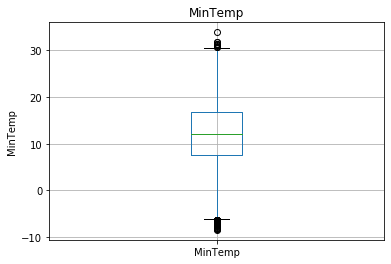

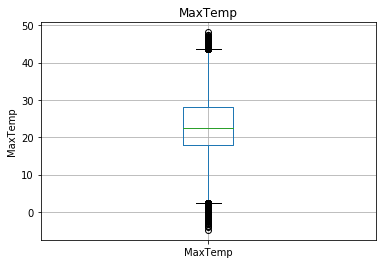

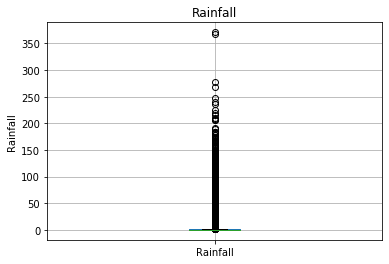

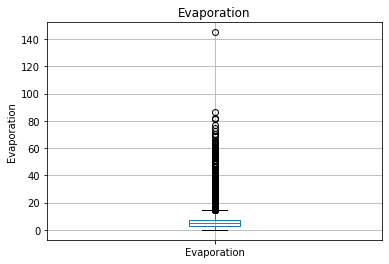

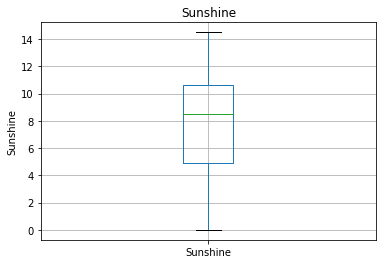

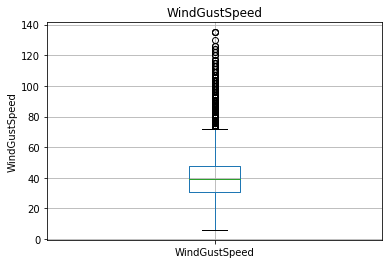

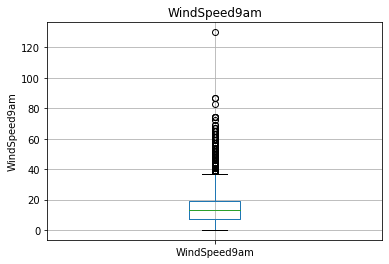

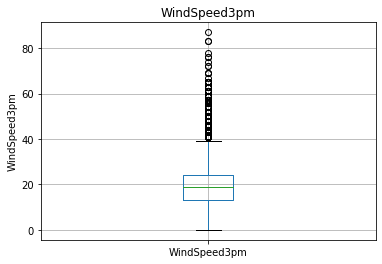

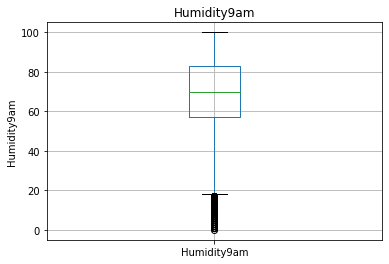

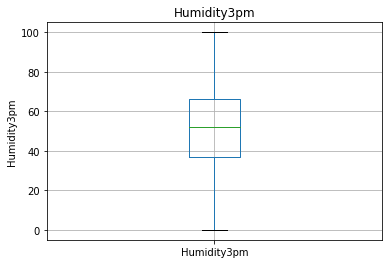

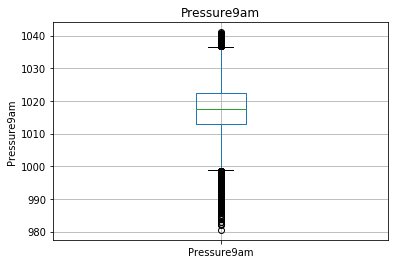

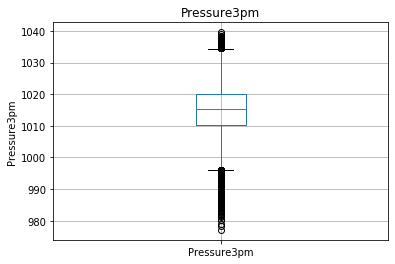

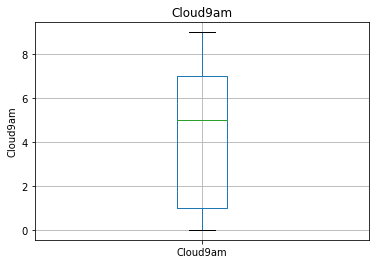

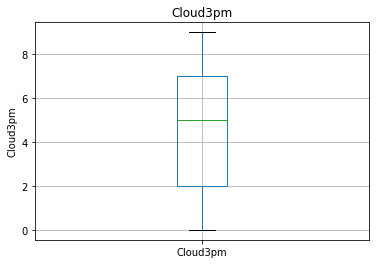

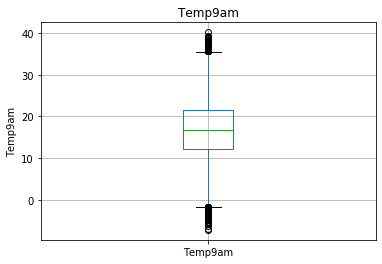

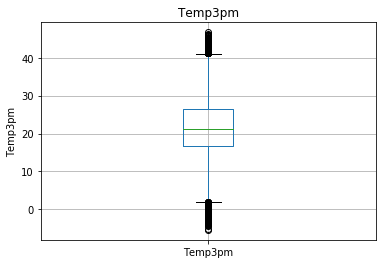

In [116]:
for feature in numerical_var:
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    
   
    

The above boxplots confirm that there are lot of outliers in these variables.

Check the distribution of variables¶
Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

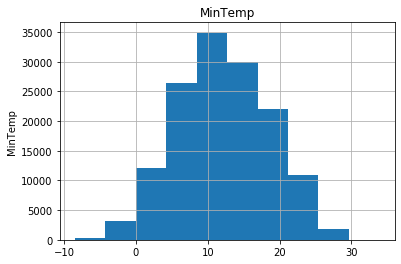

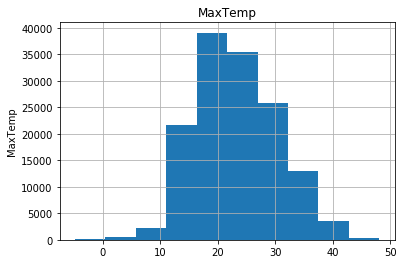

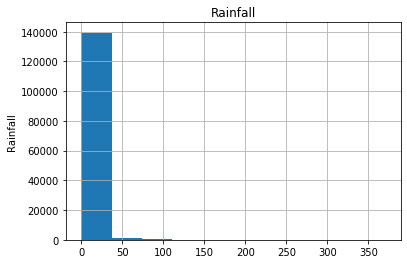

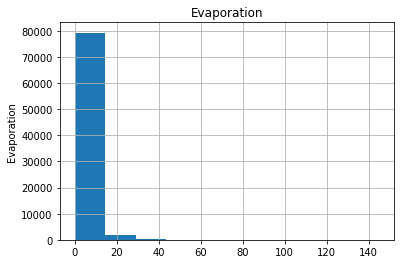

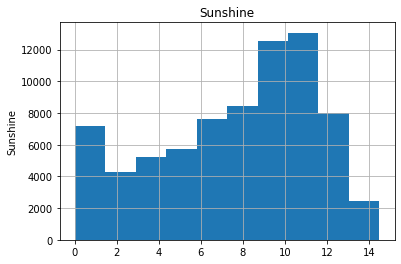

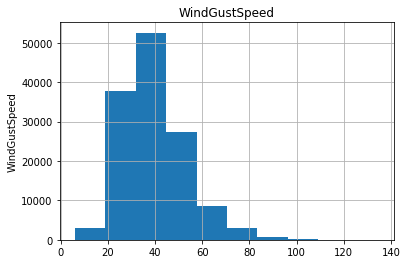

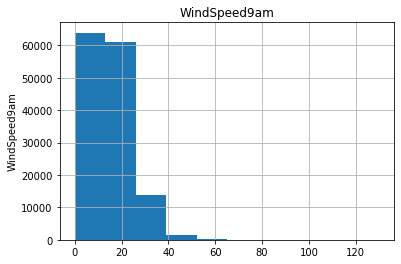

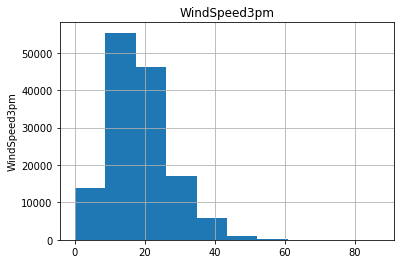

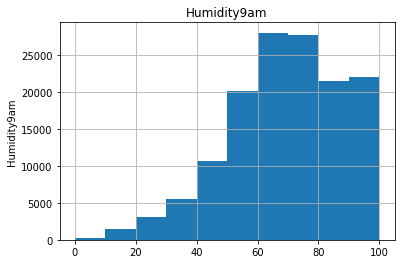

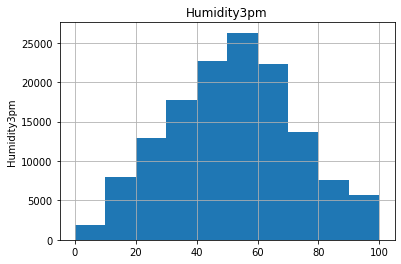

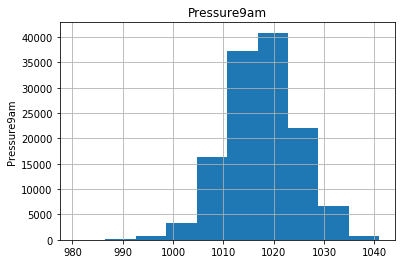

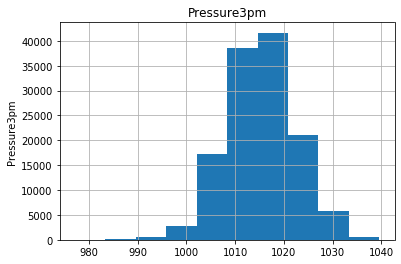

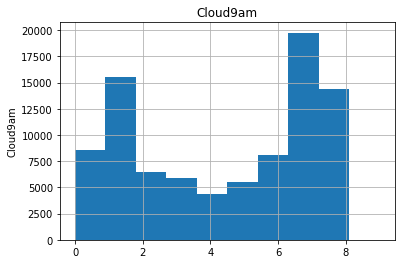

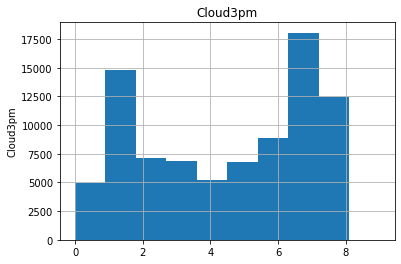

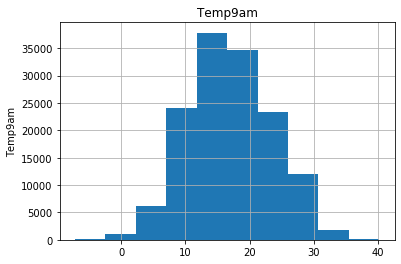

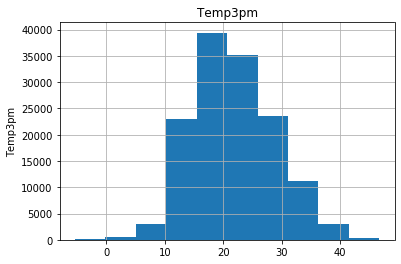

In [117]:
for feature in numerical_var:
    dataset[feature].hist()
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers

In [118]:
# find outliers for Rainfall variable

In [119]:
IQR=dataset.Rainfall.quantile(0.75)-dataset.Rainfall.quantile(0.25)

In [120]:
Low_freq=dataset.Rainfall.quantile(0.25)-(IQR*3)
upper_frq=dataset.Rainfall.quantile(0.75)+(IQR*3)

In [121]:
print('Any value less than {}'.format(Low_freq) ,'are outliers')

Any value less than -2.4000000000000004 are outliers


In [122]:
print('Any value greater than {}'.format(upper_frq) ,'are outliers')


Any value greater than 3.2 are outliers


For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [123]:
# find outliers for Evaporation variable

In [124]:
IQR_Eva=dataset.Evaporation.quantile(0.75)-dataset.Evaporation.quantile(0.25)
low_freq=dataset.Evaporation.quantile(0.25)-(IQR_Eva*3)
high_freq=dataset.Evaporation.quantile(0.75)+(IQR_Eva*3)

In [125]:
print('Any value less than {}'.format(low_freq) ,'are outliers')

Any value less than -11.800000000000002 are outliers


In [126]:
print('Any value greater than {}'.format(high_freq),'are outliers')

Any value greater than 21.800000000000004 are outliers


For Evaporation, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [127]:
# find outliers for WindSpeed9am variable

In [128]:
IQR_WIND=dataset.WindSpeed9am.quantile(0.75)-dataset.WindSpeed9am.quantile(0.25)
lowfreq=dataset.WindSpeed9am.quantile(0.25)-(IQR_WIND*3)
highfreq=dataset.WindSpeed9am.quantile(0.75)+(IQR_WIND*3)

In [129]:
print('Any value less than {}'.format(lowfreq) ,'are outliers')

Any value less than -29.0 are outliers


In [130]:
print('Any value greater than {}'.format(highfreq),'are outliers')

Any value greater than 55.0 are outliers


For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [131]:
# find outliers for WindSpeed3pm variable

IQR = dataset.WindSpeed3pm.quantile(0.75) - dataset.WindSpeed3pm.quantile(0.25)
Lower_fence = dataset.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = dataset.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0

# Multivariate Analysis

An important step in EDA is to discover patterns and relationships between variables in the dataset.

I will use heat map and pair plot to discover the patterns and relationships in the dataset.

First of all, I will draw a heat map.

In [132]:
corr=dataset.corr()

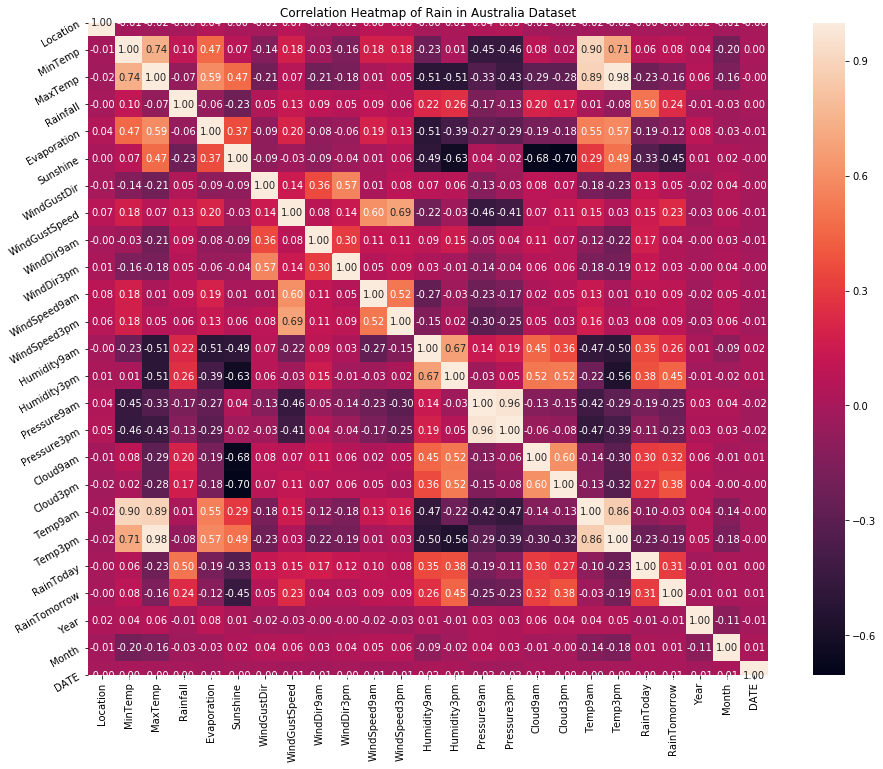

In [133]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

# Interpretation


From the above correlation heat map, we can conclude that :-

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

# Pair Plot 

First of all, I will define extract the variables which are highly positively correlated.

In [134]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

In [135]:
#Now, I will draw pairplot to depict relationship between these variables.

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


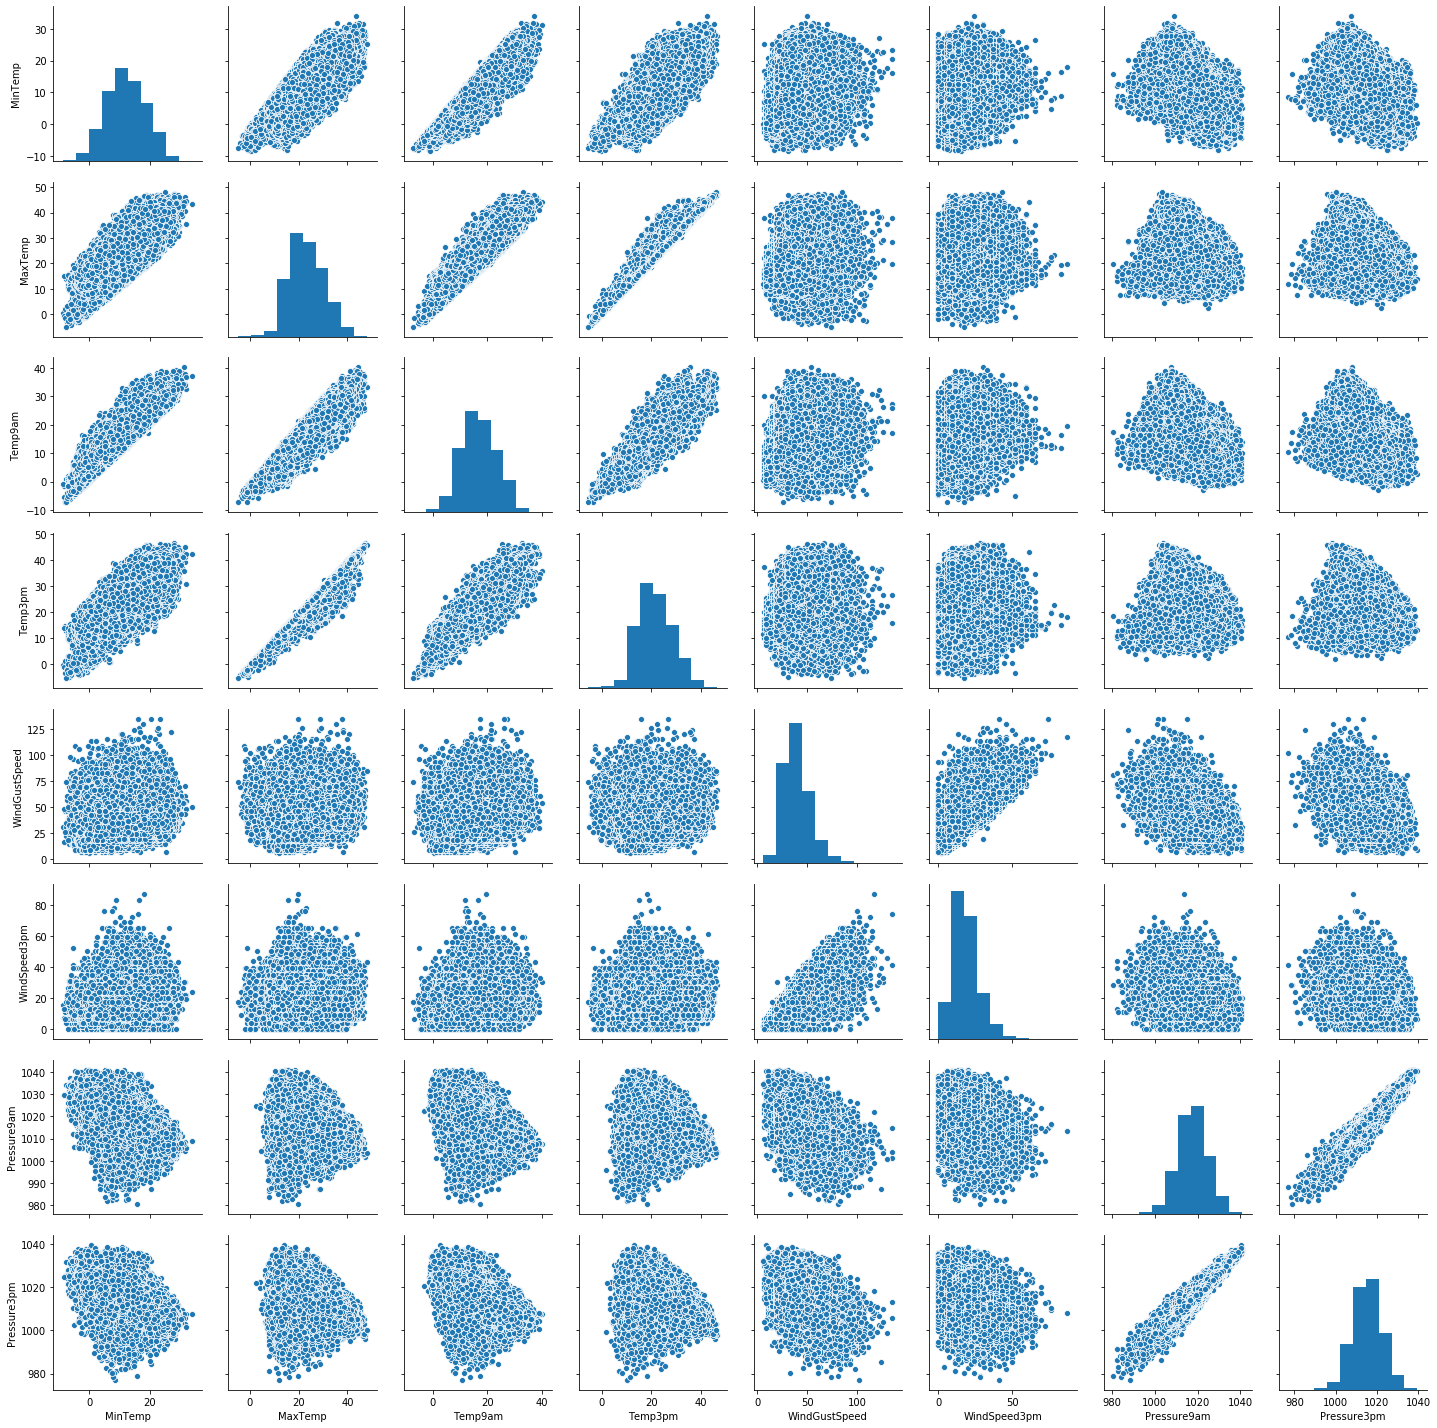

In [136]:
sns.pairplot(dataset[num_var],kind='scatter',diag_kind='hist',palette='Rainbow')
plt.show()


I have defined a variable num_var which consists of MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed3pm, Pressure9am and Pressure3pm variables.

The above pair plot shows relationship between these variables.

Declare feature vector and target variable

In [137]:
X=dataset.drop(columns=['RainTomorrow'])
y=dataset['RainTomorrow']

In [138]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

Using TensorFlow backend.


In [139]:
#Split data into separate training and test set

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [142]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 24), (28439, 24))

# Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [143]:
X_train.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
Year               int32
Month              int32
DATE               int32
dtype: object

In [144]:
#Engineering missing values in numerical variables

In [145]:
X_train[numerical_var].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
dtype: int64

In [146]:
X_test[numerical_var].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
dtype: int64

In [147]:
for feature in numerical_var:
    if X_train[feature].isnull().mean()>0:
        print(feature,np.round(X_train[feature].isnull().mean()*100,4),'%missing values')
        
    

MinTemp 0.4351 %missing values
MaxTemp 0.2321 %missing values
Rainfall 1.0013 %missing values
Evaporation 42.8275 %missing values
Sunshine 47.7469 %missing values
WindGustSpeed 6.4763 %missing values
WindSpeed9am 0.9547 %missing values
WindSpeed3pm 1.8408 %missing values
Humidity9am 1.2738 %missing values
Humidity3pm 2.5406 %missing values
Pressure9am 9.8564 %missing values
Pressure3pm 9.8335 %missing values
Cloud9am 37.9213 %missing values
Cloud3pm 40.2342 %missing values
Temp9am 0.6505 %missing values
Temp3pm 1.9085 %missing values


Assumption
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [148]:
# impute missing values in X_train and X_test with respective column median in X_train

In [149]:
for feature in numerical_var:
    if X_train[feature].isnull().sum()>0:
        X_train[feature].fillna(X_train[feature].median(), inplace=True)
        

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [150]:

X_train[numerical_var].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [151]:
X_test.isnull().sum()

Location             0
MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustDir          0
WindGustSpeed     1903
WindDir9am           0
WindDir3pm           0
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
RainToday            0
Year                 0
Month                0
DATE                 0
dtype: int64

In [152]:
for feature in numerical_var:
    if X_test[feature].isnull().sum()>0:
        X_test[feature].fillna(X_test[feature].median(),inplace=True)

In [153]:
X_train[numerical_var].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [154]:
# check missing values in numerical variables in X_test

X_test[numerical_var].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Now, we can see that there are no missing values in the numerical columns of training and test set.

# Engineering missing values in categorical variables 

In [155]:
categorical_na

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [156]:
X_train[categorical_na].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [157]:
# check missing values in categorical variables in X_test

X_test[categorical_na].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check, I will check for missing values in X_train and X_test

In [158]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
DATE             0
dtype: int64

In [159]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
DATE             0
dtype: int64

In [160]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,DATE
86232,8,17.4,29.0,0.0,3.6,11.1,5,33.0,9,5,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,0,2012,10,9
57576,6,6.8,14.4,0.8,0.8,8.5,8,46.0,12,8,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,0,2011,5,24
124071,43,10.1,15.4,14.6,4.8,8.5,15,31.0,12,10,13.0,9.0,70.0,61.0,1014.4,1016.1,5.0,5.0,12.3,13.0,1,2009,8,6
117955,31,14.4,33.4,0.0,8.0,11.6,12,41.0,2,12,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,0,2009,3,6
133468,3,6.8,14.3,10.0,0.2,7.3,0,28.0,1,2,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,1,2010,7,2


Engineering outliers in numerical variables 
We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [161]:
X_train['Rainfall']

110803     0.2
87289      2.0
134949     0.0
85553      0.0
16110      0.0
57943     14.8
125834     0.0
130086    25.0
124849     0.6
42945     20.2
14055      0.0
33542      0.6
37347      1.4
44372      0.4
4640       0.0
33345     29.0
135865     0.0
18046      0.0
131181     0.0
86623      0.0
13787      0.0
82634      0.2
142157     0.0
12507      5.0
88676      0.0
97411      0.0
26382      0.0
136973     0.0
23355      7.0
13628      0.0
          ... 
119423    10.0
84665      0.0
122144     1.6
49811      0.0
131869     0.0
31921     28.6
108504     0.0
133568     0.0
73135      0.4
132943     0.4
83966     16.8
7877       0.0
70608      0.0
67699      0.0
137993     0.0
82457     78.0
101201     0.0
108631     0.0
17089      0.0
80186      0.0
52620      0.0
48600      0.0
112420     0.0
86293      0.0
122579     2.2
41993      0.0
97639      0.0
95939      1.2
117952     0.0
43567      0.0
Name: Rainfall, Length: 113754, dtype: float64

In [162]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])



In [163]:
for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [164]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [165]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [166]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [167]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [168]:
X_train[numerical_var].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000


We can now see that the outliers in Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns are fixed.

In [169]:
X_train.shape,X_test.shape

((113754, 24), (28439, 24))

In [170]:
y_train.shape,y_test.shape


((113754,), (28439,))

In [171]:
X_train,y_train=nm.fit_sample(X_train,y_train)

In [172]:
X_test,y_test=nm.fit_sample(X_test,y_test)

In [173]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((51010, 24), (12744, 24), (51010,), (12744,))

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

Feature Scaling

In [174]:
cols=X_train.columns

In [175]:
cols


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'DATE'],
      dtype='object')

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [177]:
X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [178]:
from sklearn.linear_model import LogisticRegression

In [194]:
model=LogisticRegression(solver='liblinear')

In [195]:
logit_model=model.fit(X_train,y_train)
logit_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
y_pred=logit_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [197]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [201]:
confusion_matrix(y_test,y_pred)

array([[4994, 1378],
       [1853, 4519]], dtype=int64)

In [202]:
accuracy_score(y_pred,y_test)

0.7464689265536724

In [203]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [213]:
random_forestmodel=forest.fit(X_train,y_train)

In [214]:
yhat=forest.predict(X_test)

In [224]:
cm=confusion_matrix(y_test,yhat)

In [216]:
accuracy_score(y_test,yhat)

0.8021814187068425

In [217]:
from sklearn.model_selection import cross_val_score

In [218]:
scores=cross_val_score(random_forestmodel,X_train,y_train,cv=5,scoring='accuracy')

In [211]:
scores

array([0.71662419, 0.74455989, 0.74465791, 0.74955891, 0.75034307])

In [219]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7757


In [225]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [226]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5328 1044]
 [1477 4895]]

True Positives(TP) =  5328

True Negatives(TN) =  4895

False Positives(FP) =  1044

False Negatives(FN) =  1477


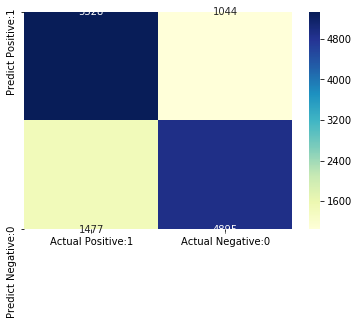

In [227]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [229]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      6372
           1       0.82      0.77      0.80      6372

    accuracy                           0.80     12744
   macro avg       0.80      0.80      0.80     12744
weighted avg       0.80      0.80      0.80     12744



In [230]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8022


In [231]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8362


In [232]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7830


In [233]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1758


In [234]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8242


In [ ]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()